In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
numSamples = 204

base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
dataset = pd.read_excel(base_dir+'\_data\HOA_PD_SRM_Output_StatsTable__05-Jun-2024.xlsx')


### Extract the Inputs and Outputs of the Model

In [4]:
input = dataset.iloc[:, 43:47]
input_arr = input.to_numpy()

output = dataset.iloc[:, 79:87]
output_arr = output.to_numpy()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_arr, output_arr, test_size=0.3, train_size=0.7)

### Complete PCA and find Principal Components

In [5]:
def runPCA(trainData, testData, isY, threshold = 0.85):
    scaling = StandardScaler()
    scaled_train = scaling.fit_transform(trainData)
    scaled_test = scaling.transform(testData)

    principal_comp = PCA()
    trainData = principal_comp.fit(scaled_train)
    
    cum_variance = np.cumsum(principal_comp.explained_variance_ratio_)
    num_components = np.argmax(cum_variance >= threshold) + 1

    if isY:
        principal_comp = PCA(n_components=1)
    else:
        principal_comp = PCA(n_components=num_components)
        
    trainData = principal_comp.fit_transform(scaled_train)
    testData = principal_comp.transform(scaled_test)

    return trainData, testData, principal_comp, scaling

##PCA with Input Features
input_pca = runPCA(Xtrain, Xtest, False)
x_train = input_pca[0]
x_test = input_pca[1]
print("X = \n", "Training= \n", x_train, "\n Testing= \n", x_test)
# print(x.shape)
pca_in = input_pca[2]
# scale = input_pca[3]
# print(pca_in, scale)

X = 
 Training= 
 [[ 2.28584913e+00 -9.66182663e-01  2.28620599e+00]
 [ 1.38988573e+00 -9.29814849e-01 -1.07069723e-01]
 [ 1.29975106e-01  2.93523452e+00 -5.50865830e-01]
 [ 3.21723012e-02  1.70808785e-01  8.18111980e-01]
 [-6.91325875e-01 -3.32957237e-01 -7.35601073e-01]
 [ 4.81725944e+00 -1.32990294e-02  2.08944105e-01]
 [ 9.33322159e-02 -6.89390655e-01 -9.20005080e-01]
 [-7.58825477e-01 -3.91873222e-01  2.56615655e-01]
 [ 1.30734462e+00 -3.94959560e-01  2.80440263e-01]
 [ 1.06474332e+00 -1.52266413e-01  1.65671756e+00]
 [ 3.78957844e-01 -5.91239794e-01 -1.83079891e-01]
 [-2.17206469e+00  4.17098098e-01 -6.10831645e-01]
 [-1.15401069e-01 -5.16868819e-01  3.67430903e-01]
 [ 3.21062721e-01 -5.34736715e-01  1.09682155e-01]
 [-2.55908078e+00  1.43373512e+00  1.20235215e+00]
 [-2.73251685e-01  2.33084334e-02 -8.98235110e-01]
 [-2.15355515e+00  2.41789587e-01 -1.02437801e+00]
 [-1.31786195e+00 -1.60842516e-01 -3.97086859e-01]
 [-6.43116947e-01 -8.74403702e-02  9.97733609e-01]
 [-1.02690850

In [6]:
##PCA with Output Features
output_pca = runPCA(Ytrain, Ytest, True)
y_train = output_pca[0]
y_test = output_pca[1]
print("Y = \n", "Training= \n", y_train, "\n Testing= \n", y_test)
# print(x.shape)
pca_out = output_pca[2]

Y = 
 Training= 
 [[ 1.86212641]
 [-0.96099362]
 [-1.86823509]
 [ 0.22331306]
 [-0.23097017]
 [ 4.9616946 ]
 [ 0.80643606]
 [-0.54085164]
 [-0.66098825]
 [ 1.73709658]
 [-1.11775706]
 [-0.85900505]
 [ 0.14481178]
 [ 1.24457984]
 [-0.82502093]
 [-1.06324244]
 [-0.24340831]
 [-0.96681663]
 [ 2.0718976 ]
 [-0.85491283]
 [-0.65334318]
 [-0.83768679]
 [ 0.27754263]
 [ 0.04965932]
 [ 1.32202742]
 [-0.7593871 ]
 [-0.27087746]
 [ 0.39576519]
 [ 0.14994486]
 [-0.62283711]
 [-1.2586841 ]
 [-1.96848958]
 [ 1.41939554]
 [ 0.6184194 ]
 [ 1.77461447]
 [ 0.48735725]
 [ 0.21235359]
 [-0.94397078]
 [ 0.678394  ]
 [-0.90376401]
 [-3.10267345]
 [-2.12309864]
 [-0.33465441]
 [-0.72206183]
 [ 3.07935433]
 [-0.03485375]
 [ 2.4812767 ]
 [ 2.14656301]
 [-1.05461864]
 [ 3.03439905]
 [-0.30098273]
 [-1.47535547]
 [ 1.33228284]
 [ 1.39892896]
 [ 0.33500218]
 [-1.15696088]
 [-0.57287461]
 [ 1.70947269]
 [ 0.30551793]
 [-0.22052327]
 [-1.03208302]
 [ 0.16507679]
 [ 0.29581728]
 [-0.45636395]
 [ 1.28438397]
 [ 0.55

### Metrics and Principal Components

In [7]:
def getMetrics(principal):
    print("Variance Ratio = ", principal.explained_variance_ratio_)
    print("Cumulative Explained Variance Ratio = ", principal.explained_variance_ratio_.sum())
print("Input (X):")
getMetrics(pca_in)
print("\nOutput (Y):")
getMetrics(pca_out)

Input (X):
Variance Ratio =  [0.40763358 0.24597579 0.20183826]
Cumulative Explained Variance Ratio =  0.8554476332342019

Output (Y):
Variance Ratio =  [0.24228753]
Cumulative Explained Variance Ratio =  0.2422875326722776


### Generate Plots

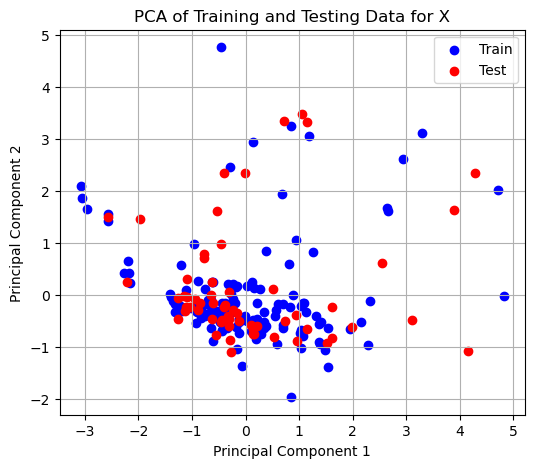

In [8]:
xplot_pca = plt.figure(figsize=(6, 5))
plt.scatter(x_train[:, 0], x_train[:, 1], c='blue', label='Train')
plt.scatter(x_test[:, 0], x_test[:, 1], c='red', label='Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training and Testing Data for X')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# yplot_pca = plt.figure(figsize=(6, 5))
# plt.scatter(y_train[:, 0], c='blue', label='Train')
# plt.scatter(y_test[:, 0], c='red', label='Test')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Training and Testing Data for Y')
# plt.legend()
# plt.grid(True)
# plt.show()

# yplot_pca.savefig(base_dir + "/_images/PCA_Y.jpg")